In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_ta as ta
sns.set_style("darkgrid")
sns.set(font_scale=1.7)

In [4]:
df = pd.DataFrame()
df = df.ta.ticker("AAPL").tz_localize(None)
rsi = df.ta.rsi(append=True)
macd = df.ta.macd(append=True)
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,
2024-01-22,192.300003,195.330002,192.259995,193.889999,60133900,0.0,0.0,60.698088,-0.402178,0.653717,-1.055894
2024-01-23,195.020004,195.750000,193.830002,195.179993,42355600,0.0,0.0,62.629499,0.188980,0.995900,-0.806919
2024-01-24,195.419998,196.380005,194.339996,194.500000,53631300,0.0,0.0,60.929723,0.595740,1.122128,-0.526388
2024-01-25,195.220001,196.270004,193.110001,194.169998,54822100,0.0,0.0,60.077561,0.881312,1.126160,-0.244848
2024-01-26,194.270004,194.759995,191.940002,192.070007,32069554,0.0,0.0,54.822946,0.927488,0.937868,-0.010381


In [5]:
buy_ticker = "GDDY"
sell_ticker = "ABT"
ticker1 = yf.Ticker(buy_ticker)
ticker2 = yf.Ticker(sell_ticker)
dataFrame1 = ticker1.history(
    start='2017-1-1', actions=True, rounding=True)
dataFrame2 = ticker2.history(
    start='2017-1-1', actions=True, rounding=True)

ratio = pd.DataFrame(dataFrame1.Close / dataFrame2.Close)
spread = pd.DataFrame( dataFrame1.Close - dataFrame2.Close)

In [19]:
ratio["MA50"] = ratio.Close.rolling(50).mean()
ratio["Min50"] = ratio.Close.rolling(50).min()
ratio["Max50"] = ratio.Close.rolling(50).max()
UpperBand = (ratio.Close.rolling(50).mean()) + \
    (ratio["Close"].rolling(50).std())
LowerBand = (ratio.Close.rolling(50).mean()) - \
    (ratio["Close"].rolling(50).std())
ratio["EMA50"] = ratio.Close.ewm(span=100, adjust=False).mean()
ratio["EMA20"] = ratio.Close.ewm(span=12, adjust=False).mean()
ratio["MACD"] = ratio["EMA20"] - ratio["EMA50"]
ratio["MACD signal"] = ratio["MACD"].ewm(span=9, adjust=False).mean()


In [11]:
print(ratio.tail(2))

                              Close      MA50    Min50    Max50     EMA50  \
Date                                                                        
2024-01-25 00:00:00-05:00  0.955536  0.955660  0.90886  1.00309  0.945893   
2024-01-26 00:00:00-05:00  0.962026  0.956388  0.90886  1.00309  0.947088   

                              EMA20      MACD  MACD signal  
Date                                                        
2024-01-25 00:00:00-05:00  0.946205  0.000312    -0.003521  
2024-01-26 00:00:00-05:00  0.948639  0.001551    -0.002506  


In [7]:
z_score = (ratio - ratio.mean())/ratio.std()

mean_Mavg100 = z_score.rolling(window=100, center=False).mean()
mean_Mavg50 = z_score.rolling(window=50, center=False).mean()


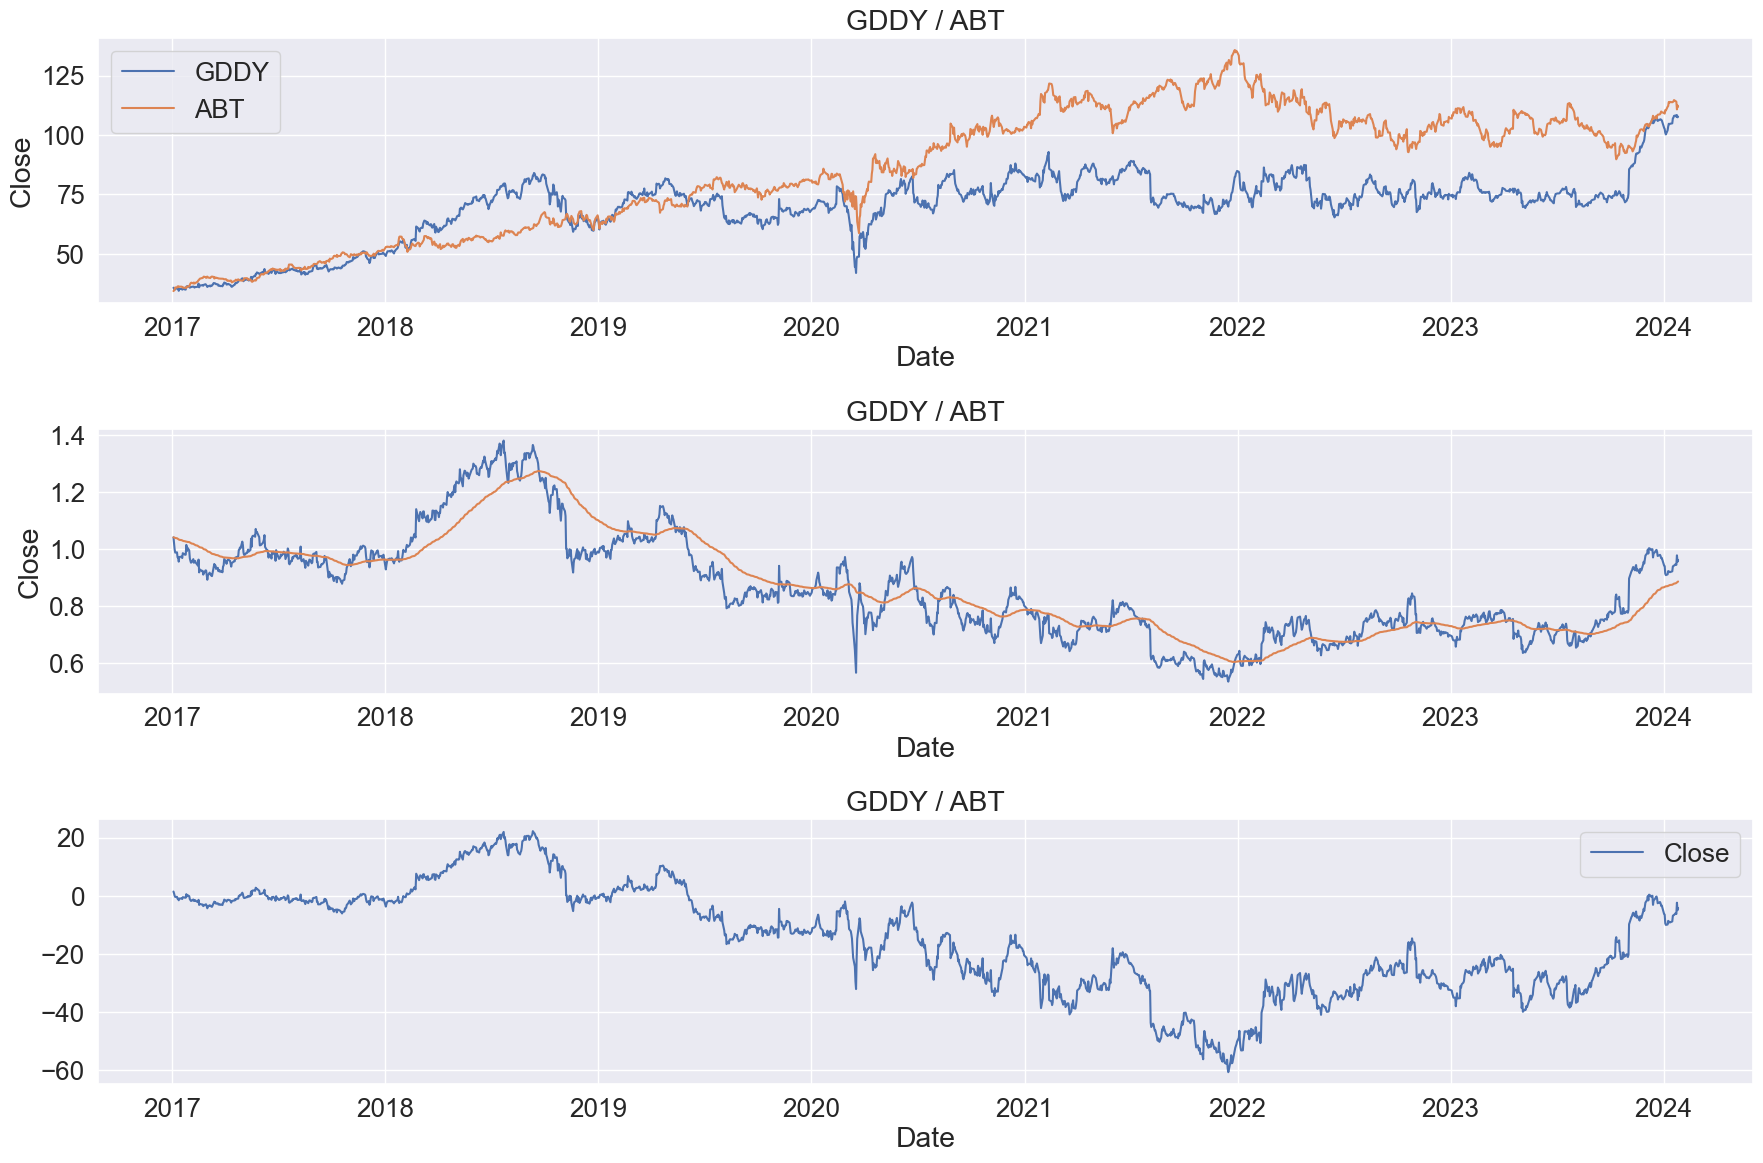

In [20]:
fig, axes = plt.subplots(3, figsize=(18, 12))

axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=dataFrame1, x="Date", y="Close",
             ax=axes[0], label=buy_ticker)
sns.lineplot(data=dataFrame2, x="Date", y="Close",
             ax=axes[0], label=sell_ticker)

axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=ratio.Close, ax=axes[1])
sns.lineplot(data=ratio.EMA50, ax=axes[1])

axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=spread, ax=axes[2])


plt.tight_layout(pad=1)
